# Spaceship Titanic Competition 🚀

In this notebook we are going to predict which passengers are transported to an alternate dimension.

## Problem Defintion

A spaceship named Titanic carrying almost 13,000 passengers collided with a spacetime anomaly hidden within a dust cloud. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension. We have to predict which passengers are transported.

## Data

We are given two main datasets.

* *`Train.csv`*  It is the training dataset containing personal records of almost ~8700 passengers.

* *`Test.csv`*  It is the test dataset containing personal records of almost ~4300 passengers.

## Evaluation

We need to submit it as a csv file having two columns PassengerID and Transported (Predicted Label). It will be evaluated on their classification accuracy (the percentage of predicted labels that are correct).

## Features

Our dataset has following features.

* `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

* `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* `Destination` - The planet the passenger will be debarking to.

* `Age` - The age of the passenger.

* `VIP` - Whether the passenger has paid for special VIP service during the voyage.

* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* `Name` - The first and last names of the passenger.

* `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



In [1]:
# import necessory tools.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## Load Training data

Firstly we will import our training data. Then we will preprocess the data and will make it suitable for predictions.

In [2]:
# loading training data.
df = pd.read_csv('spaceship-titanic data/train.csv')

# viewing first 5 rows.
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Check the shape of the data
df.shape # (rows,columns)

(8693, 14)

In [4]:
## Check for null values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: xlabel='Destination', ylabel='Transported'>

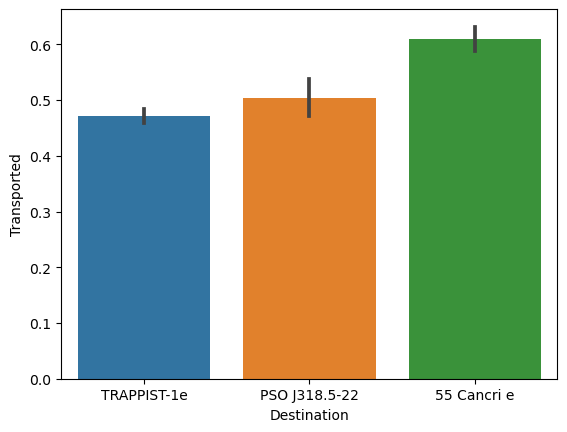

In [5]:
sns.barplot(x=df['Destination'],y=df['Transported'])

<Axes: xlabel='HomePlanet', ylabel='Transported'>

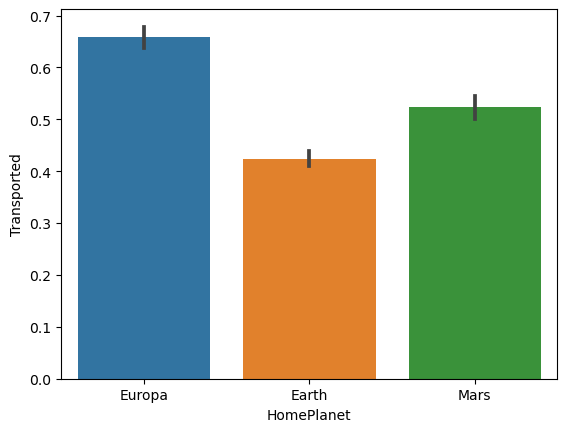

In [6]:
sns.barplot(x=df['HomePlanet'],y=df['Transported'])

## Preprocessing our data

**Note** We will drop `Name` and `Cabin` column from the dataset.

In [7]:
df.drop(["Name","Cabin"],axis=1,inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [8]:
# Filling the missing values.

# Fill the null values in categorical columns with mode.

df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])

# Fill the null values in numerical columns with mean.

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())

In [9]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [10]:
# Converting columns with boolean values into integer 0 or 1.
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

# Converting PassengerId into int
df['PassengerId'] = df['PassengerId'].astype(str).astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   int32  
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int32  
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int32  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   int32  
dtypes: float64(6), int32(4), object(2)
memory usage: 679.3+ KB


In [12]:
HomePlanet = pd.get_dummies(df['HomePlanet'])
HomePlanet.head()

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [13]:
Destination = pd.get_dummies(df['Destination'])
Destination.head()

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
df_train = pd.concat([df,HomePlanet, Destination],axis=1)
df_train.drop(['HomePlanet','Destination'],axis=1,inplace=True)
df_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,101,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,201,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,301,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,302,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,401,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


## Splitting our data into training and validation set.

In [15]:
# Split data into X & y.
X = df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [16]:
X.shape, y.shape

((8693, 15), (8693,))

In [17]:
# Split our data into train and validation set

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((6954, 15), (6954,), (1739, 15), (1739,))

## Training and fitting models.

We will train different models and fit them. And will evaluate them on our validation set and which performs better we will select it to make prediction on our test data.

In [18]:
# Import different models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
# Creating an dictionary for models we are going to use.
models = {"LogisticRegression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "SVC": SVC()}

# Function to fit and evaluate different models
def fit_and_score(models,X_train,X_val,y_train,y_val):
    np.random.seed(42)
    model_scores= {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_val,y_val)
    
    return model_scores   

In [20]:
model_scores = fit_and_score(models,X_train,X_val,y_train,y_val)
model_scores

{'LogisticRegression': 0.7556066705002875,
 'KNN': 0.6060954571592869,
 'Random Forest': 0.7745830937320299,
 'SVC': 0.5497412305922944}

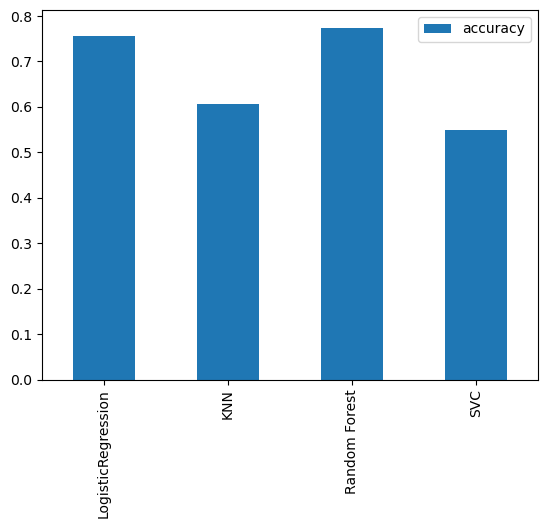

In [21]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

In [22]:
# tuning KNN

train_score = []
test_score = []

# list for different values of n_neighbors
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    # appending the parameter
    knn.set_params(n_neighbors=i)
    
    # fit the model
    knn.fit(X_train,y_train)
    
    # update train score
    train_score.append(knn.score(X_train,y_train))
    
    # update test score
    test_score.append(knn.score(X_val,y_val))

In [23]:
max(test_score)

0.6612995974698103

KNN model is not improving further so let's tune other models

## Hyperparameter tuning with RandomizedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# hyperparameter grid for logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver": ["liblinear"]} 

# hyperparameter for RandomForest
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [26]:
%%time
# Tune Logistic Regression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 9.92 s
Wall time: 5.21 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [28]:
rs_log_reg.score(X_val,y_val)

0.7550316273720529

In [30]:
%%time
# Let's tune Random Forest Regressor

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 6min 51s
Wall time: 7min 8s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [32]:
rs_rf.score(X_val,y_val)

0.7872340425531915

## Hyperparameter tuning with GridSearchCV

In [36]:
%%time

np.random.seed(42)

gs_rf_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [2,4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

gs_rf_reg = GridSearchCV(RandomForestClassifier(),
                          param_grid=gs_rf_grid,
                          cv=3,
                          verbose=2,
                          n_jobs=4)

gs_rf_reg.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
CPU times: total: 5.09 s
Wall time: 2min 21s


F:\Desktop\Aquib extras\SpaceShip Titanic Project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [37]:
gs_rf_reg.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

In [39]:
gs_rf_reg.score(X_val,y_val)

0.7659574468085106

# Test Data

In [41]:
test_data = pd.read_csv('spaceship-titanic data/test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Preprocessing data

In [42]:
test_data.drop(["Name","Cabin"],axis=1,inplace=True)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [45]:
# Filling the missing values.

# Fill the null values in categorical columns with mode.

test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0])
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0])
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])
test_data['VIP'] = test_data['VIP'].fillna(test_data['VIP'].mode()[0])

# Fill the null values in numerical columns with mean.

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['RoomService'] = test_data['RoomService'].fillna(test_data['RoomService'].mean())
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(test_data['FoodCourt'].mean())
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].mean())
test_data['Spa'] = test_data['Spa'].fillna(test_data['Spa'].mean())
test_data['VRDeck'] = test_data['VRDeck'].fillna(test_data['VRDeck'].mean())

In [47]:
# Converting columns with boolean values into integer 0 or 1.
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)
test_data['VIP'] = test_data['VIP'].astype(int)

# Converting PassengerId into int
test_data['PassengerId'] = test_data['PassengerId'].astype(str).astype(int)

In [49]:
HomePlanet = pd.get_dummies(test_data['HomePlanet'])
HomePlanet.head()

,Earth,Europa,Mars
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [50]:
Destination = pd.get_dummies(test_data['Destination'])
Destination.head()

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [52]:
df_test = pd.concat([test_data,HomePlanet, Destination],axis=1)
df_test.drop(['HomePlanet','Destination'],axis=1,inplace=True)
df_test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,1301,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,1801,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,1901,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,2101,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,2301,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


## Fitting into model

In [53]:
y_preds = rs_rf.predict(df_test)

In [54]:
y_preds

array([1, 0, 1, ..., 1, 1, 1])

In [61]:
y_preds.astype(bool)
y_preds

array([ True, False,  True, ...,  True,  True,  True])

## Saving CSV

In [78]:
test_data = pd.read_csv('spaceship-titanic data/test.csv')

df_preds = pd.DataFrame()
df_preds['PassengerId'] = test_data['PassengerId']
df_preds['Transported'] = y_preds
df_preds.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [79]:
df_preds['PassengerId'].dtype

dtype('O')

In [80]:
df_preds.to_csv('spaceship-titanic-prediction.csv',index=False)